## Pizza - Multi Class Classify

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import random
from shutil import copyfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2021-10-26 04:52:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   179MB/s    in 2.8s    

2021-10-26 04:52:04 (179 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# content -> 10_food_classes_all_data -> train -> chicken_curry, chicken_wings, etc
# content -> 10_food_classes_all_data -> test -> chicken_curry, chicken_wings, etc

import os
import zipfile

local_zip = '/content/10_food_classes_all_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
base_dir = '/content/10_food_classes_all_data'

train_dir = os.path.join(base_dir, '/train')
valid_dir = os.path.join(base_dir, '/test')

In [5]:
for dirpath, dirnames, filenames in os.walk(base_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chi

In [6]:
import pathlib

data_dir = pathlib.Path('/content/10_food_classes_all_data/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [7]:
TRAIN_DIR = "/content/10_food_classes_all_data/train/"
VALID_DIR = "/content/10_food_classes_all_data/test/"

In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (511, 512, 3)


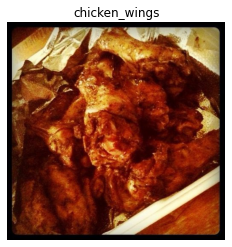

In [9]:
import random

img = view_random_image(target_dir=TRAIN_DIR,
                        target_class=random.choice(class_names))

Image shape: (384, 512, 3)


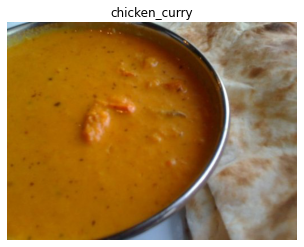

In [10]:
import random

img = view_random_image(target_dir=VALID_DIR,
                        target_class=random.choice(class_names))

In [11]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
CHANNELS = 3

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)        

train_generator = train_datagen.flow_from_directory(
                                  TRAIN_DIR,   
                                  target_size=(IMG_HEIGHT, IMG_WIDTH),       # same as model input image size
                                  batch_size=41,             
                                  seed=20,                      
                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [13]:
valid_datagen = ImageDataGenerator(rescale=1./255.)

valid_generator = valid_datagen.flow_from_directory(
                                  VALID_DIR, 
                                  target_size=(IMG_HEIGHT, IMG_WIDTH),  
                                  batch_size=41,
                                  seed=20,
                                  class_mode='categorical')

Found 2500 images belonging to 10 classes.


In [ ]:
len(class_names)

10

In [14]:
NUM_CLASSES = len(class_names)

In [15]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

## Checking out LR Range

In [17]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [18]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [19]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=12)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [20]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 8))

In [21]:
epochs = 40
callbacks = [early_stopping, model_checkpoint, lr_schedule]

In [22]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/40
183/183 [==============================] - 57s 292ms/step - loss: 2.3055 - accuracy: 0.1099 - val_loss: 2.2801 - val_accuracy: 0.1760
Epoch 2/40
183/183 [==============================] - 52s 286ms/step - loss: 2.2684 - accuracy: 0.1512 - val_loss: 2.2151 - val_accuracy: 0.2076
Epoch 3/40
183/183 [==============================] - 53s 290ms/step - loss: 2.1925 - accuracy: 0.1891 - val_loss: 2.1151 - val_accuracy: 0.2360
Epoch 4/40
183/183 [==============================] - 53s 288ms/step - loss: 2.1189 - accuracy: 0.2281 - val_loss: 2.0466 - val_accuracy: 0.2660
Epoch 5/40
183/183 [==============================] - 52s 286ms/step - loss: 2.0537 - accuracy: 0.2587 - val_loss: 1.9745 - val_accuracy: 0.3016
Epoch 6/40
183/183 [==============================] - 53s 288ms/step - loss: 1.9828 - accuracy: 0.2968 - val_loss: 1.9145 - val_accuracy: 0.3312
Epoch 7/40
183/183 [==============================] - 53s 288ms/step - loss: 1.9235 - accuracy: 0.3241 - val_loss: 1.8514 - val_ac

(1e-06, 0.1, 1.3, 2.3)

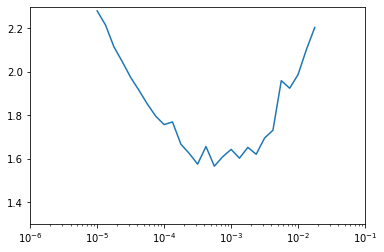

In [23]:
plt.semilogx(history.history['lr'], history.history['val_loss'])
plt.axis([1e-6, 1e-1, 1.3, 2.3])

In [24]:
history.history['lr']

[1e-05,
 1.3335214e-05,
 1.7782793e-05,
 2.3713737e-05,
 3.1622778e-05,
 4.216965e-05,
 5.6234134e-05,
 7.4989424e-05,
 1e-04,
 0.00013335215,
 0.00017782794,
 0.00023713737,
 0.00031622776,
 0.00042169652,
 0.0005623413,
 0.0007498942,
 0.001,
 0.0013335214,
 0.0017782794,
 0.0023713738,
 0.0031622776,
 0.004216965,
 0.0056234132,
 0.0074989423,
 0.01,
 0.013335214,
 0.017782794]

In [25]:
history.history['val_loss']

[2.2800562381744385,
 2.215056896209717,
 2.1150970458984375,
 2.046628713607788,
 1.9745230674743652,
 1.9144644737243652,
 1.8514275550842285,
 1.7957873344421387,
 1.757215976715088,
 1.769332766532898,
 1.6671831607818604,
 1.6245900392532349,
 1.5753415822982788,
 1.656272292137146,
 1.5659807920455933,
 1.6093355417251587,
 1.6431214809417725,
 1.6027437448501587,
 1.652295708656311,
 1.6207542419433594,
 1.695206880569458,
 1.7311714887619019,
 1.9591208696365356,
 1.9244757890701294,
 1.9870890378952026,
 2.102485179901123,
 2.2039527893066406]

## Finalizing LR

In [26]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [27]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.001)     # 1e-3
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [28]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [29]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=12)
reduce_lr         = ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0001, factor=0.05, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [30]:
epochs = 30
callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [31]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/30
183/183 [==============================] - 54s 291ms/step - loss: 2.1829 - accuracy: 0.1861 - val_loss: 2.0212 - val_accuracy: 0.2728
Epoch 2/30
183/183 [==============================] - 53s 287ms/step - loss: 2.0292 - accuracy: 0.2693 - val_loss: 1.8928 - val_accuracy: 0.3452
Epoch 3/30
183/183 [==============================] - 53s 287ms/step - loss: 1.9053 - accuracy: 0.3284 - val_loss: 1.8140 - val_accuracy: 0.3640
Epoch 4/30
183/183 [==============================] - 53s 288ms/step - loss: 1.7832 - accuracy: 0.3801 - val_loss: 1.7285 - val_accuracy: 0.4016
Epoch 5/30
183/183 [==============================] - 53s 291ms/step - loss: 1.6973 - accuracy: 0.4159 - val_loss: 1.6338 - val_accuracy: 0.4328
Epoch 6/30
183/183 [==============================] - 53s 289ms/step - loss: 1.6043 - accuracy: 0.4536 - val_loss: 1.5961 - val_accuracy: 0.4476
Epoch 7/30
183/183 [==============================] - 53s 291ms/step - loss: 1.4966 - accuracy: 0.4941 - val_loss: 1.6112 - val_ac

In [32]:
history.history

{'accuracy': [0.18613334000110626,
  0.2693333327770233,
  0.32839998602867126,
  0.38013333082199097,
  0.4158666729927063,
  0.4535999894142151,
  0.494133323431015,
  0.5264000296592712,
  0.5622666478157043,
  0.5899999737739563,
  0.6166666746139526,
  0.6578666567802429,
  0.6893333196640015,
  0.7141333222389221,
  0.7393333315849304,
  0.8022666573524475,
  0.8104000091552734,
  0.8123999834060669,
  0.829200029373169,
  0.8273333311080933,
  0.8371999859809875,
  0.8505333065986633],
 'loss': [2.1829123497009277,
  2.0291810035705566,
  1.905314564704895,
  1.7831745147705078,
  1.6973111629486084,
  1.6042922735214233,
  1.4966083765029907,
  1.4045994281768799,
  1.301387906074524,
  1.2093967199325562,
  1.1058979034423828,
  1.0178357362747192,
  0.9083635807037354,
  0.8393376469612122,
  0.7673110961914062,
  0.5893859267234802,
  0.5458459854125977,
  0.5353454947471619,
  0.5005157589912415,
  0.512404203414917,
  0.48198577761650085,
  0.4388129413127899],
 'lr': [0.0

<Figure size 432x288 with 0 Axes>

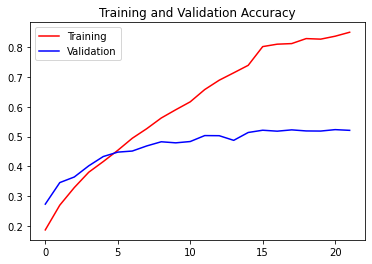

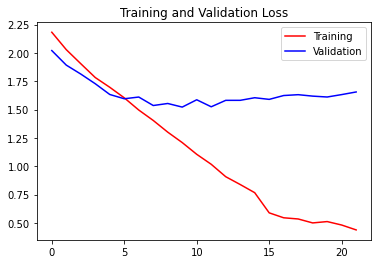

<Figure size 432x288 with 0 Axes>

In [33]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

## Transfer Learning

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import random
from shutil import copyfile

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2021-10-27 07:34:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   159MB/s    in 3.1s    

2021-10-27 07:34:37 (159 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
# content -> 10_food_classes_all_data -> train -> chicken_curry, chicken_wings, etc
# content -> 10_food_classes_all_data -> test -> chicken_curry, chicken_wings, etc

import os
import zipfile

local_zip = '/content/10_food_classes_all_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
base_dir = '/content/10_food_classes_all_data'

In [6]:
import pathlib

data_dir = pathlib.Path('/content/10_food_classes_all_data/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [19]:
len(class_names)

10

In [7]:
TRAIN_DIR = "/content/10_food_classes_all_data/train/"
VALID_DIR = "/content/10_food_classes_all_data/test/"

In [14]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
CHANNELS = 3

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)        

train_generator = train_datagen.flow_from_directory(
                                  TRAIN_DIR,   
                                  target_size=(IMG_HEIGHT, IMG_WIDTH),       # same as model input image size
                                  batch_size=41,             
                                  seed=20,                      
                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [16]:
valid_datagen = ImageDataGenerator(rescale=1./255.)

valid_generator = valid_datagen.flow_from_directory(
                                  VALID_DIR, 
                                  target_size=(IMG_HEIGHT, IMG_WIDTH),  
                                  batch_size=41,
                                  seed=20,
                                  class_mode='categorical')

Found 2500 images belonging to 10 classes.


In [21]:
# EfficientNetB0 feature vector (version 1)

model_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [22]:
# save pretrained model as a Keras layer

feature_extractor_layer = hub.KerasLayer(model_url,
                                        trainable=False,                                      # freeze the underlying patterns
                                        name='feature_extraction_layer')

In [20]:
NUM_CLASSES = len(class_names)

In [23]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    feature_extractor_layer,
    layers.Dense(NUM_CLASSES, activation='softmax', name='output_layer')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [25]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.001)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [26]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [28]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=6)
reduce_lr         = ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [29]:
epochs = 10
callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [30]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/10
183/183 [==============================] - 100s 333ms/step - loss: 0.8623 - accuracy: 0.7587 - val_loss: 0.4315 - val_accuracy: 0.8836
Epoch 2/10
183/183 [==============================] - 58s 318ms/step - loss: 0.4684 - accuracy: 0.8605 - val_loss: 0.3448 - val_accuracy: 0.8996
Epoch 3/10
183/183 [==============================] - 58s 319ms/step - loss: 0.3927 - accuracy: 0.8804 - val_loss: 0.3150 - val_accuracy: 0.9016
Epoch 4/10
183/183 [==============================] - 58s 316ms/step - loss: 0.3476 - accuracy: 0.8931 - val_loss: 0.2927 - val_accuracy: 0.9124
Epoch 5/10
183/183 [==============================] - 58s 315ms/step - loss: 0.3126 - accuracy: 0.9065 - val_loss: 0.2798 - val_accuracy: 0.9140
Epoch 6/10
183/183 [==============================] - 57s 313ms/step - loss: 0.2867 - accuracy: 0.9152 - val_loss: 0.2751 - val_accuracy: 0.9160
Epoch 7/10
183/183 [==============================] - 58s 316ms/step - loss: 0.2648 - accuracy: 0.9221 - val_loss: 0.2718 - val_a

<Figure size 432x288 with 0 Axes>

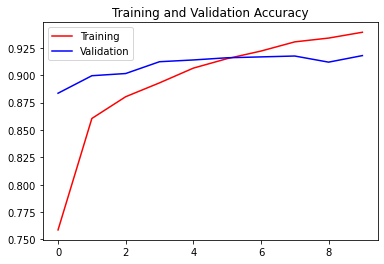

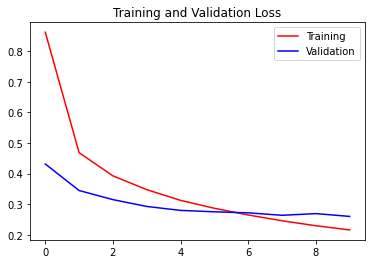

<Figure size 432x288 with 0 Axes>

In [31]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()